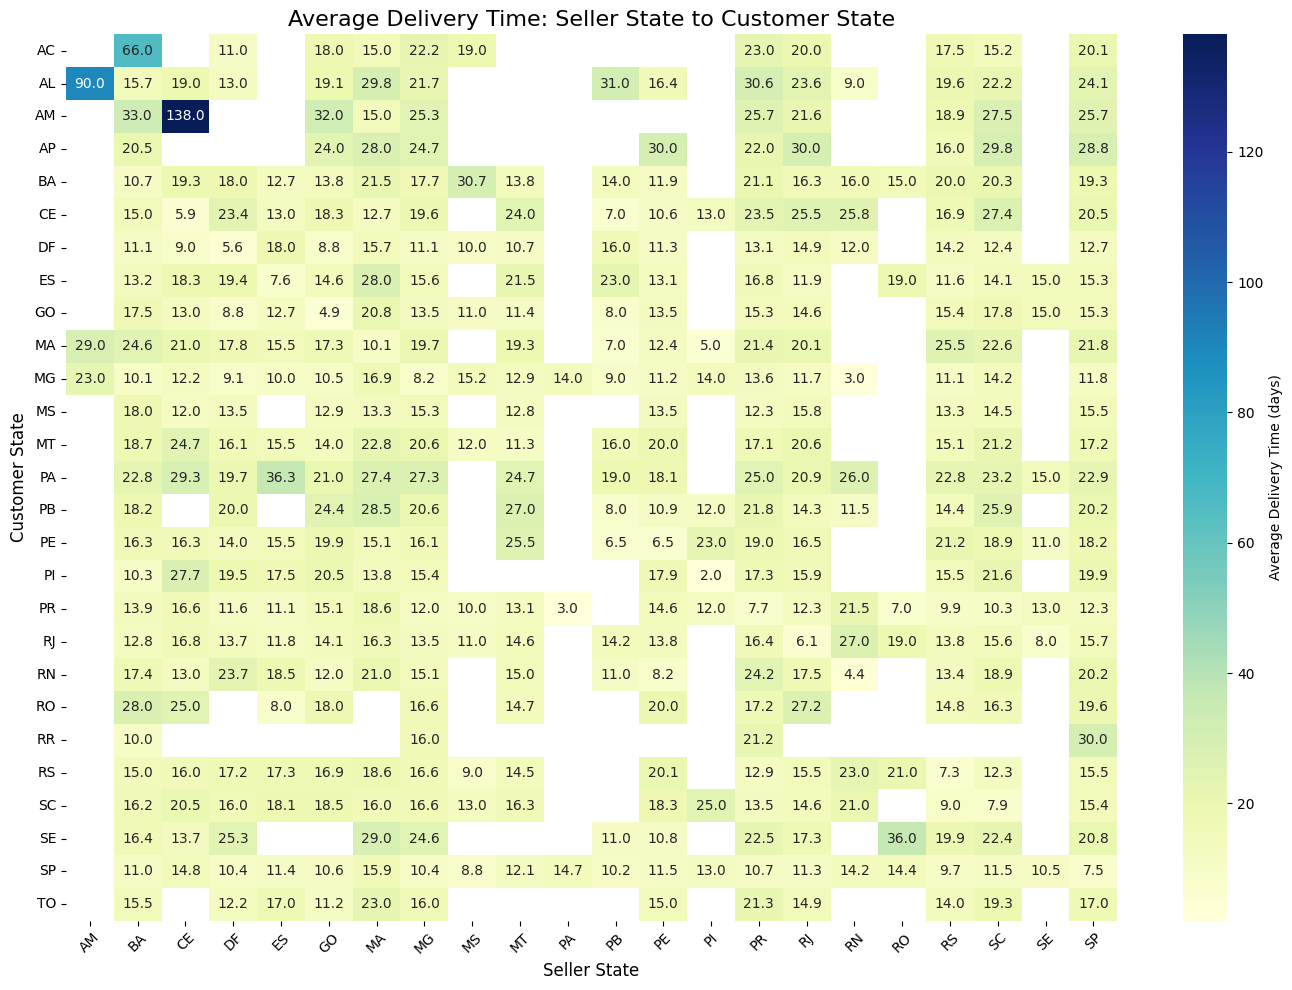

15일 이상 걸리는 판매자-소비자 지역 조합:
    seller_state customer_state  delivery_time_days
0             AM             AL           90.000000
1             AM             MA           29.000000
2             AM             MG           23.000000
3             BA             AC           66.000000
4             BA             AL           15.700000
..           ...            ...                 ...
406           SP             RR           30.027027
407           SP             RS           15.514638
408           SP             SC           15.353267
409           SP             SE           20.848101
411           SP             TO           17.035398

[236 rows x 3 columns]

판매자 지역이 등장한 횟수:
seller_state
SP    23
MG    21
PR    20
MA    19
SC    18
BA    17
RJ    16
CE    14
GO    14
RS    13
DF    12
ES    10
PE     8
MT     7
RN     7
PB     5
RO     4
AM     3
MS     3
PI     2
Name: count, dtype: int64


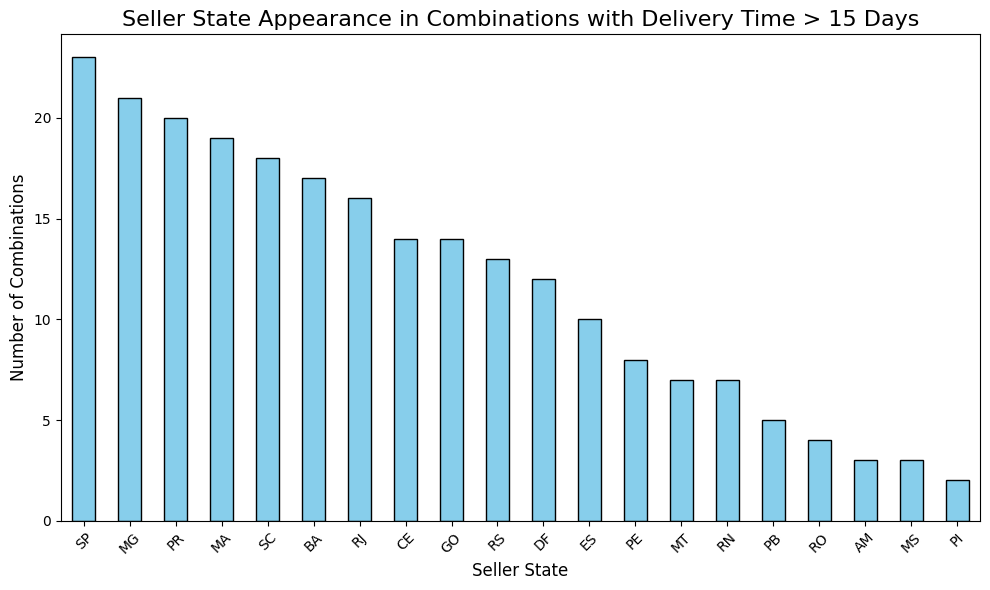

15일 이하 걸리는 판매자-소비자 지역 조합:
    seller_state customer_state  delivery_time_days
7             BA             BA           10.662162
8             BA             CE           15.000000
9             BA             DF           11.055556
10            BA             ES           13.230769
13            BA             MG           10.094340
..           ...            ...                 ...
384           SE             SP           10.500000
391           SP             DF           12.723323
395           SP             MG           11.824346
402           SP             PR           12.303408
410           SP             SP            7.461462

[176 rows x 3 columns]

판매자 지역이 등장한 횟수:
seller_state
PE    16
RS    13
MT    12
GO    11
DF    11
PB    11
RJ    10
BA    10
ES     9
CE     8
SC     8
MS     8
PI     7
SE     7
PR     7
MG     6
MA     6
RN     6
SP     4
PA     3
RO     3
Name: count, dtype: int64


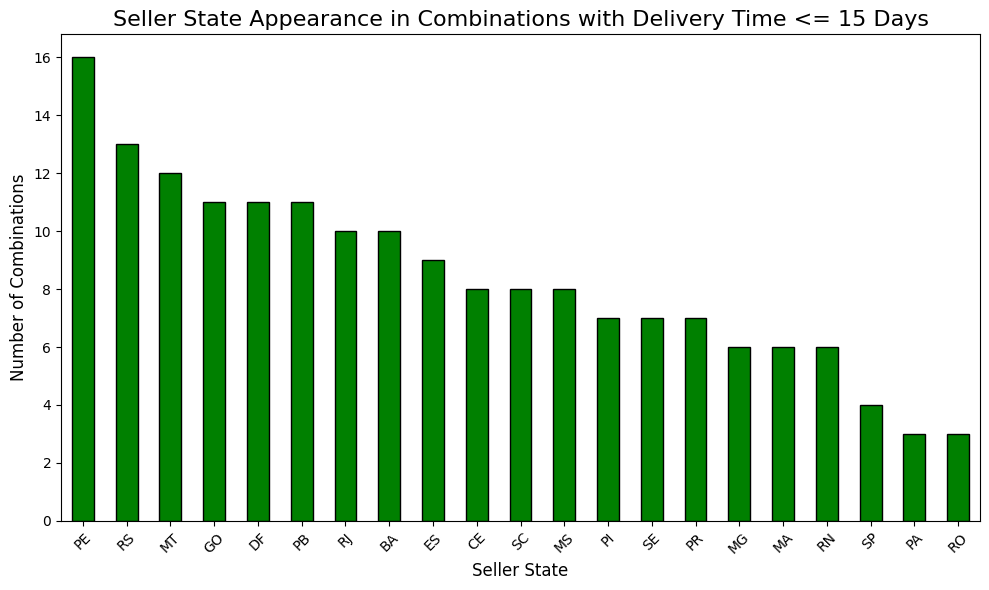

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: 데이터 불러오기
file_paths = {
    "order_items": "olist_order_items_dataset.csv",
    "sellers": "olist_sellers_dataset.csv",
    "orders": "olist_orders_dataset.csv",
    "customers": "olist_customers_dataset.csv"
}

# 데이터 로드
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# 데이터셋 할당
order_items = datasets['order_items']
sellers = datasets['sellers']
orders = datasets['orders']
customers = datasets['customers']

# Step 2: 데이터 병합
# 주문 아이템에 판매자 정보 병합
order_items_with_sellers = pd.merge(order_items, sellers, on='seller_id', how='left')

# 주문 데이터에 고객 정보 병합
orders_with_customers = pd.merge(orders, customers, on='customer_id', how='left')

# 모든 데이터를 병합
complete_data = pd.merge(order_items_with_sellers, orders_with_customers, on='order_id', how='left')

# Step 3: 날짜 컬럼 변환 및 배송 시간 계산
# 날짜 컬럼을 datetime 형식으로 변환
date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date']
for col in date_columns:
    complete_data[col] = pd.to_datetime(complete_data[col], errors='coerce')

# 배송 시간 계산 (일 단위)
complete_data['delivery_time_days'] = (complete_data['order_delivered_customer_date'] - complete_data['order_purchase_timestamp']).dt.days

# 유효한 데이터만 필터링
valid_data = complete_data.dropna(subset=['delivery_time_days'])
valid_data = valid_data[valid_data['delivery_time_days'] >= 0]

# Step 4: 판매자 주 → 소비자 주별 평균 배송 시간 계산
seller_to_customer_delivery = valid_data.groupby(['seller_state', 'customer_state'])['delivery_time_days'].mean().reset_index()

# Step 5: 피벗 테이블 생성
pivot_table = seller_to_customer_delivery.pivot_table(
    index='customer_state', 
    columns='seller_state', 
    values='delivery_time_days', 
    aggfunc='mean'
)

# Step 6: 히트맵 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Delivery Time (days)'})
plt.title('Average Delivery Time: Seller State to Customer State', fontsize=16)
plt.xlabel('Seller State', fontsize=12)
plt.ylabel('Customer State', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 1: 15일 이상 걸리는 판매자-소비자 지역 조합 필터링
long_delivery_combinations = seller_to_customer_delivery[seller_to_customer_delivery['delivery_time_days'] > 15]

# Step 2: 판매자 지역(seller_state) 등장 횟수 계산
seller_state_counts = long_delivery_combinations['seller_state'].value_counts()

# Step 3: 결과 출력
print("15일 이상 걸리는 판매자-소비자 지역 조합:")
print(long_delivery_combinations)

print("\n판매자 지역이 등장한 횟수:")
print(seller_state_counts)

# Step 4: 시각화 (판매자 지역 등장 횟수)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
seller_state_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Seller State Appearance in Combinations with Delivery Time > 15 Days', fontsize=16)
plt.xlabel('Seller State', fontsize=12)
plt.ylabel('Number of Combinations', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 1: 15일 이하 걸리는 판매자-소비자 지역 조합 필터링
short_delivery_combinations = seller_to_customer_delivery[seller_to_customer_delivery['delivery_time_days'] <= 15]

# Step 2: 판매자 지역(seller_state) 등장 횟수 계산
seller_state_counts = short_delivery_combinations['seller_state'].value_counts()

# Step 3: 결과 출력
print("15일 이하 걸리는 판매자-소비자 지역 조합:")
print(short_delivery_combinations)

print("\n판매자 지역이 등장한 횟수:")
print(seller_state_counts)

# Step 4: 시각화 (판매자 지역 등장 횟수)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
seller_state_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Seller State Appearance in Combinations with Delivery Time <= 15 Days', fontsize=16)
plt.xlabel('Seller State', fontsize=12)
plt.ylabel('Number of Combinations', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 결과 분석
히트맵
- 이상치때문에 색깔이 비슷해보이지만, 축을 보면 알 수 있듯이 조금의 색깔 차이도 큰 숫자 차이라서 예민하게 봐야함
- 히트맵 결과를 토대로 배송하는데 15일이 넘는 판매자지역-소비자지역 조합을 찾고, 판매자 지역이 각각 몇 번 등장했는지 보여주는 시각화를 진행
- 주문량이 너무 많은 SP지역은 제외하고 봐야함.
- SP-SP로 시키는 택배 물량을 제외하고 다른 모든 지역으로 갈 때 배송일이 대부분 15일이 넘었음.
- 또한 소비자가 SP에 거주하고 있으면, 배송을 받는데 걸리는 시간이 평균 15일 미만으로 굉장히 안정적임.
- 따라서 SP로 가는 택배는 문제가 없음
- 또한 15일 미만의 판매자 지역을 보았을 때 특정 지역끼리의 배송 체계는 잘 갖춰져있는 경우도 있는 것 같음

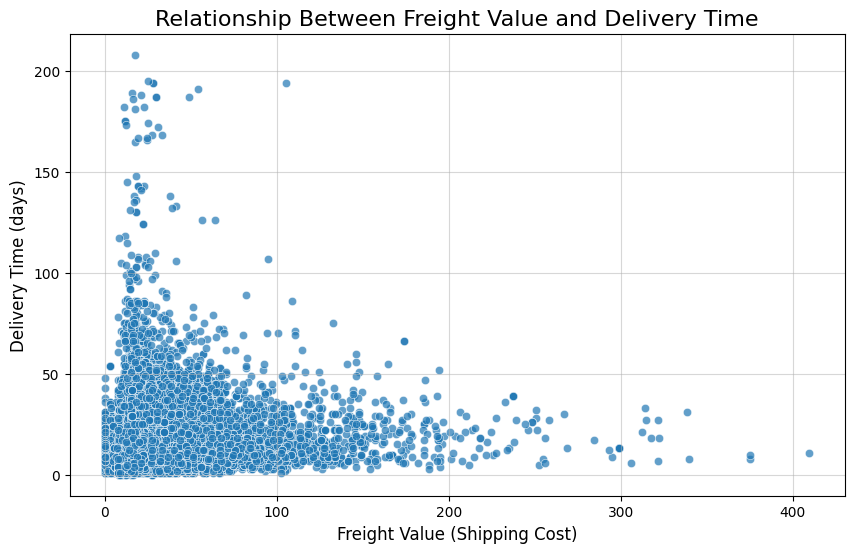

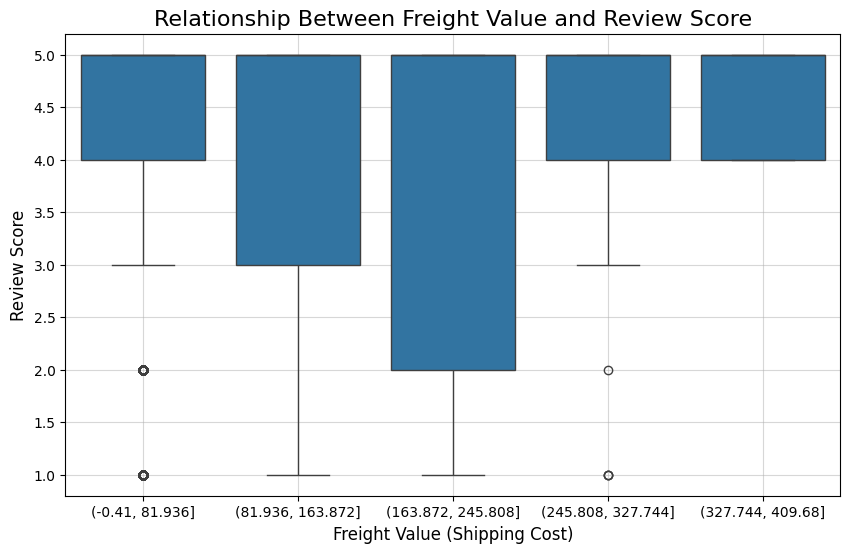

Correlation Matrix:
                    freight_value  delivery_time_days  review_score
freight_value            1.000000            0.215044     -0.032863
delivery_time_days       0.215044            1.000000     -0.304058
review_score            -0.032863           -0.304058      1.000000


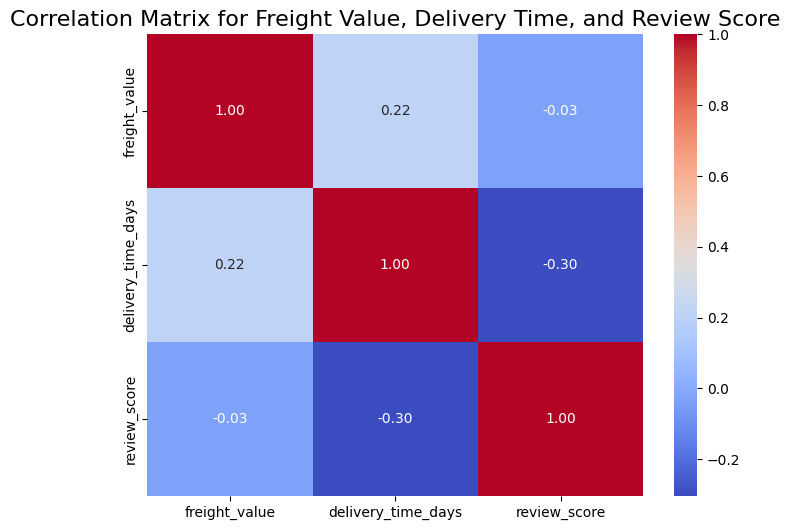

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: 데이터 불러오기
file_paths = {
    "order_items": "olist_order_items_dataset.csv",
    "orders": "olist_orders_dataset.csv",
    "order_reviews": "olist_order_reviews_dataset.csv"
}

# 데이터 로드
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# 데이터셋 할당
order_items = datasets['order_items']
orders = datasets['orders']
order_reviews = datasets['order_reviews']

# Step 2: 데이터 병합
# 주문 아이템과 주문 데이터 병합
order_items_with_orders = pd.merge(order_items, orders, on='order_id', how='left')

# 주문 데이터에 리뷰 데이터 병합
complete_data = pd.merge(order_items_with_orders, order_reviews, on='order_id', how='left')

# Step 3: 날짜 컬럼 변환 및 배송 시간 계산
# 날짜 컬럼을 datetime 형식으로 변환
date_columns = ['order_purchase_timestamp', 'order_delivered_customer_date']
for col in date_columns:
    complete_data[col] = pd.to_datetime(complete_data[col], errors='coerce')

# 배송 시간 계산 (일 단위)
complete_data['delivery_time_days'] = (complete_data['order_delivered_customer_date'] - complete_data['order_purchase_timestamp']).dt.days

# 유효한 데이터만 필터링
valid_data = complete_data.dropna(subset=['freight_value', 'delivery_time_days', 'review_score'])
valid_data = valid_data[valid_data['delivery_time_days'] >= 0]

# Step 4: 배송비와 배송 시간의 관계 분석
plt.figure(figsize=(10, 6))
sns.scatterplot(data=valid_data, x='freight_value', y='delivery_time_days', alpha=0.7)
plt.title('Relationship Between Freight Value and Delivery Time', fontsize=16)
plt.xlabel('Freight Value (Shipping Cost)', fontsize=12)
plt.ylabel('Delivery Time (days)', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Step 5: 배송비와 리뷰 점수의 관계 분석
plt.figure(figsize=(10, 6))
sns.boxplot(data=valid_data, x=pd.cut(valid_data['freight_value'], bins=5), y='review_score')
plt.title('Relationship Between Freight Value and Review Score', fontsize=16)
plt.xlabel('Freight Value (Shipping Cost)', fontsize=12)
plt.ylabel('Review Score', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Step 6: 상관관계 계산 (배송비, 배송 시간, 리뷰 점수)
correlation_matrix = valid_data[['freight_value', 'delivery_time_days', 'review_score']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 7: 시각화 (상관관계 히트맵)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Freight Value, Delivery Time, and Review Score', fontsize=16)
plt.show()


In [22]:
pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\ckddu\AppData\Local\Temp\ipykernel_5756\528631489.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_score_reviews['keywords'] = low_score_reviews['review_comment_message'].apply(lambda x: extract_keywords(x, keywords))


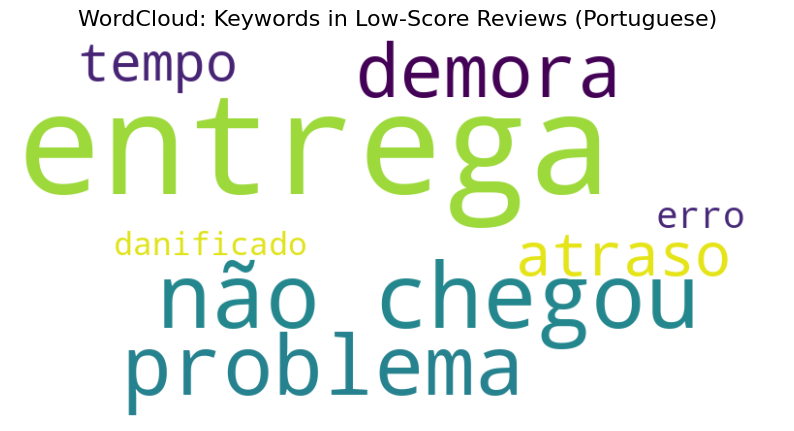

포르투갈어 배송 관련 키워드 빈도:
entrega: 1419회
demora: 255회
não chegou: 386회
problema: 330회
tempo: 123회
erro: 49회
atraso: 162회
danificado: 37회

낮은 점수 리뷰의 평균 배송 시간: 19.74일


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Step 1: 데이터 불러오기
file_paths = {
    "orders": "olist_orders_dataset.csv",
    "order_reviews": "olist_order_reviews_dataset.csv"
}

# 데이터 로드
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# 데이터셋 할당
orders = datasets['orders']
order_reviews = datasets['order_reviews']

# Step 2: 데이터 병합
# 주문 데이터와 리뷰 데이터 병합
reviews_with_orders = pd.merge(order_reviews, orders, on='order_id', how='left')

# 날짜 컬럼 변환
reviews_with_orders['order_purchase_timestamp'] = pd.to_datetime(reviews_with_orders['order_purchase_timestamp'])
reviews_with_orders['order_delivered_customer_date'] = pd.to_datetime(reviews_with_orders['order_delivered_customer_date'])

# 배송 시간 계산 (일 단위)
reviews_with_orders['delivery_time_days'] = (reviews_with_orders['order_delivered_customer_date'] - reviews_with_orders['order_purchase_timestamp']).dt.days

# 유효한 데이터만 필터링
valid_reviews = reviews_with_orders.dropna(subset=['review_score', 'delivery_time_days'])
valid_reviews = valid_reviews[valid_reviews['delivery_time_days'] >= 0]

# Step 3: 낮은 점수 리뷰 텍스트 분석 (포르투갈어 키워드 사용)
# 낮은 점수(1~2점) 리뷰 필터링
low_score_reviews = valid_reviews[(valid_reviews['review_score'] == 1) | (valid_reviews['review_score'] == 2)]

# 포르투갈어 키워드 설정
keywords = ['atraso', 'demora', 'entrega', 'problema', 'erro', 'tempo', 'não chegou', 'danificado']

# 키워드 추출 함수
def extract_keywords(text, keyword_list):
    if pd.isna(text):
        return []
    return [word for word in keyword_list if word in text.lower()]

# 키워드 추출 및 빈도 계산
low_score_reviews['keywords'] = low_score_reviews['review_comment_message'].apply(lambda x: extract_keywords(x, keywords))
all_keywords = Counter([word for sublist in low_score_reviews['keywords'] for word in sublist])

# Step 4: 키워드 시각화 (워드클라우드)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_keywords)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud: Keywords in Low-Score Reviews (Portuguese)', fontsize=16)
plt.show()

# Step 5: 결과 요약
print("포르투갈어 배송 관련 키워드 빈도:")
for word, count in all_keywords.items():
    print(f"{word}: {count}회")

# Step 6: 낮은 리뷰 점수와 평균 배송 시간 출력
avg_delivery_time_low_reviews = low_score_reviews['delivery_time_days'].mean()
print(f"\n낮은 점수 리뷰의 평균 배송 시간: {avg_delivery_time_low_reviews:.2f}일")
